In [1]:
import pandas as pd
import matplotlib
import numpy as np
from ema_workbench.util import ema_logging, save_results, load_results
from ema_workbench.analysis import lines, Density
import ema_workbench.analysis.prim as prim
import matplotlib.pyplot as plt

C:\Users\gerardvansmede\Anaconda3\envs\emaworkbench\lib\site-packages\ema_workbench\em_framework\evaluators.py:58: UserWarning: ipyparallel not installed - IpyparalleEvaluator not available
  warnings.warn("ipyparallel not installed - IpyparalleEvaluator not available")
C:\Users\gerardvansmede\Anaconda3\envs\emaworkbench\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


In [2]:
def load_uncertainties(datafile):
    data = pd.read_csv(datafile, sep=';')
    countries = {}
    for entry in data.iterrows():
        entry = entry[1].to_dict()
        country = entry.pop('CountryCode')
        countries[country] = entry
    return(countries)

In [3]:
input_data_file ='C:/Users/gerardvansmede/PycharmProjects/ema_tests/inputdatacountriestest.csv'
countries_dict = load_uncertainties(input_data_file)

In [4]:
print(countries_dict)

{'ARM': {'Country': 'Armenia', 'Initial cereals production': 435470, 'Initial cereals area harvested': '1597,38', 'Initial cereals feed use': 259338, 'Initial cereals consumption': 630027, 'Initial pulses production': 5201, 'Initial pulses area harvested': '19.520', 'Initial pulses feed use': 10568, 'Initial pulses consumption': 500, 'Initial roots and tubers production': 557322, 'Initial roots and tubers area harvested': '286,65', 'Initial roots and tubers feed use': 2000, 'Initial roots and tubers consumption': 557330, 'Initial treenuts production': 4540, 'Initial treenuts area harvested': '15,3', 'Initial treenuts consumption': 5220, 'Initial vegetables and melons production': 968095, 'Initial vegetables and melons area harvested': '306,77', 'Initial vegetables and melons feed use': 11, 'Initial vegetables and melons consumption': 981533, 'Initial sugar crops production': 56500, 'Initial sugar crops area harvested': '36', 'Initial sugar crops feed use': 500, 'Initial sugar crops con

In [5]:
country_codes = []
skip_countries = []
# skip_countries = ['KNA','QAT','DJI','BRB','BLZ','MDV','GNQ','SGP','BHR','ARE','KWT']
for key, value in sorted(countries_dict.items()):
    if not key in skip_countries:
        country_codes.append(key)
    
print(country_codes)

['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX', 'MLI', 'MLT', 'MMR', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRI', 'PRK', 'PRT', 'PRY', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SEN', 'SGP', 'SLB', 'SLE'

# Deze nog niet gebruikt!

In [6]:
def descriptive_country_statistics(results, indicator, moment=-1):
    experiments, outcomes = results
    outcome = outcomes[indicator]
    values = outcome[:,moment]
    average_results = np.average(values)
    lowest_results = np.min(values)
    highest_results = np.max(values)
    return lowest_results, average_results, highest_results

In [8]:
fn = r'20220113_10000_run_outputdata.tar.gz'
results = load_results(fn)

In [9]:
experiments, outcomes = results

starttime = 2011
keys = outcomes.keys()

all_KPIs = []

for key in sorted(keys):
    print(key)
    all_KPIs.append(key)
    
    
print(all_KPIs)

Atmosphere
Global anthropogenic fossil fuel use
Global arable land
Global carbon storage in biomass
Global carbon stored in soil
Global food shortage
Global forests cover
Global land converted for agriculture
Global land converted for terrestrial carbon storage
Global land converted for urban area expansion
Global other lands
Global pastures and emadows cover
Global permanent crops cover
Global wetlands cover
Net food balance[Cereals]
Net food balance[Eggs]
Net food balance[Fish and seafood]
Net food balance[Fruit excl melons]
Net food balance[Meat]
Net food balance[Milk]
Net food balance[Pulses]
Net food balance[Roots and tubers]
Net food balance[Sugar crops]
Net food balance[Treenuts]
Net food balance[Vegetables and melons]
TIME
Temperature rise compared to 1750
['Atmosphere', 'Global anthropogenic fossil fuel use', 'Global arable land', 'Global carbon storage in biomass', 'Global carbon stored in soil', 'Global food shortage', 'Global forests cover', 'Global land converted for agric

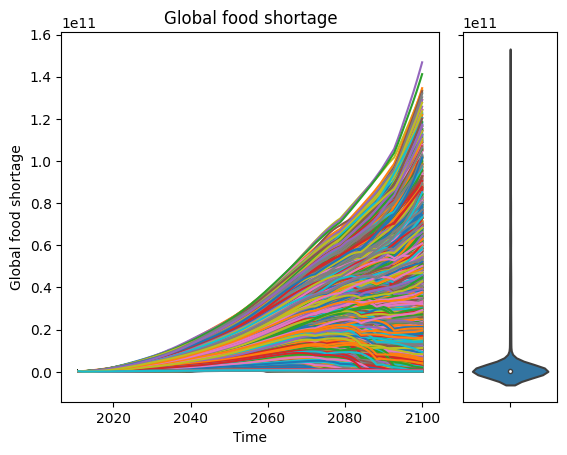

In [10]:
KPI = 'Global food shortage'
legend = False
save = True
dpi = 300

fig, axes = lines(experiments, outcomes, outcomes_to_show=KPI,density=Density.VIOLIN)
if save:
    plt.savefig(r'.\VIOLIN_lines_{}.png'.format(KPI), dpi=dpi)

In [104]:
print(outcomes['Global food shortage'])

[[2.7971968e+08 2.4859818e+08 2.1809016e+08 ... 1.4514955e+08
  1.4487576e+08 1.4459706e+08]
 [2.7971968e+08 2.1311510e+08 1.4760338e+08 ... 2.1551594e+08
  2.1533882e+08 2.1514909e+08]
 [2.7971968e+08 2.6310382e+08 2.4764086e+08 ... 5.5410390e+08
  5.5520010e+08 5.5624595e+08]
 ...
 [2.7971968e+08 2.2276482e+08 1.6675691e+08 ... 1.5649782e+08
  1.5628317e+08 1.5606784e+08]
 [2.7971968e+08 2.0545254e+08 1.3236974e+08 ... 6.1726020e+08
  6.1692900e+08 6.1650336e+08]
 [2.7971968e+08 1.9826090e+08 1.1822538e+08 ... 1.8307667e+08
  1.8286627e+08 1.8265642e+08]]


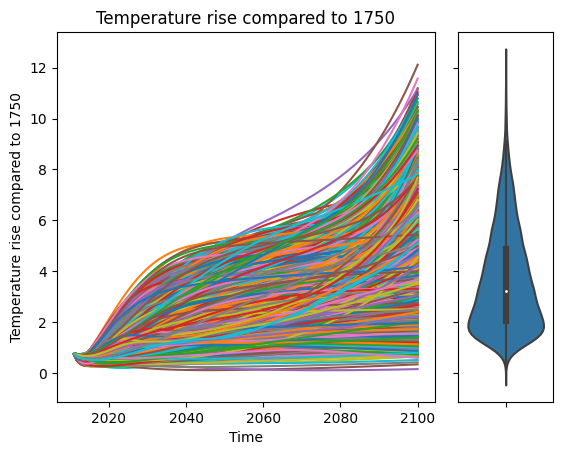

In [11]:
KPI = 'Temperature rise compared to 1750'
legend = False
save = True
dpi = 300

fig, axes = lines(experiments, outcomes,outcomes_to_show=KPI, density=Density.VIOLIN)
if save:
    plt.savefig(r'.\VIOLIN_lines_{}.png'.format(KPI), dpi=dpi)

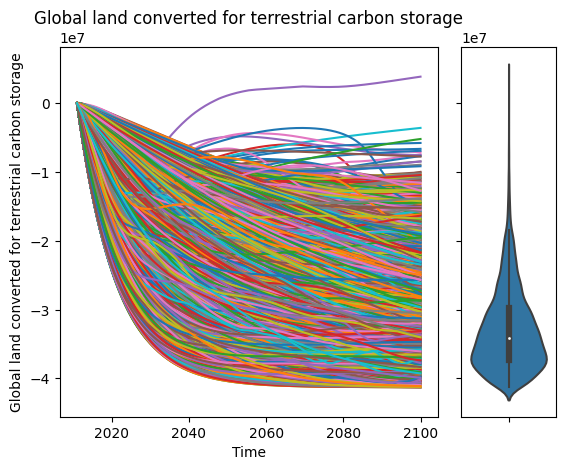

In [12]:
KPI = 'Global land converted for terrestrial carbon storage'
legend = False
save = True
dpi = 300

fig, axes = lines(experiments, outcomes, outcomes_to_show=KPI, density=Density.VIOLIN)
if save:
    plt.savefig(r'.\VIOLIN_lines_{}.png'.format(KPI), dpi=dpi)

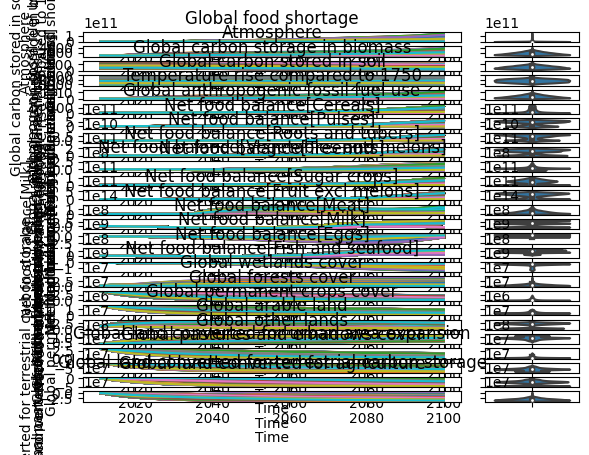

In [13]:
KPI = 'Global land converted for agriculture'
legend = False
save = True
dpi = 300

fig, axes = lines(experiments, outcomes, density=Density.VIOLIN)
if save:
    plt.savefig(r'.\VIOLIN_lines_{}.png'.format(KPI), dpi=dpi)

In [14]:
KPIs = [
        'Temperature rise compared to 1750',
        'Global food shortage',
       ]


In [15]:
for KPI in all_KPIs:
    if KPI not in KPIs:
        print('NOT USED: {}'.format(KPI))
        
for KPI in KPIs:
    if KPI not in all_KPIs:
        print('DOES NOT EXIST: {}'.format(KPI))

NOT USED: Atmosphere
NOT USED: Global anthropogenic fossil fuel use
NOT USED: Global arable land
NOT USED: Global carbon storage in biomass
NOT USED: Global carbon stored in soil
NOT USED: Global forests cover
NOT USED: Global land converted for agriculture
NOT USED: Global land converted for terrestrial carbon storage
NOT USED: Global land converted for urban area expansion
NOT USED: Global other lands
NOT USED: Global pastures and emadows cover
NOT USED: Global permanent crops cover
NOT USED: Global wetlands cover
NOT USED: Net food balance[Cereals]
NOT USED: Net food balance[Eggs]
NOT USED: Net food balance[Fish and seafood]
NOT USED: Net food balance[Fruit excl melons]
NOT USED: Net food balance[Meat]
NOT USED: Net food balance[Milk]
NOT USED: Net food balance[Pulses]
NOT USED: Net food balance[Roots and tubers]
NOT USED: Net food balance[Sugar crops]
NOT USED: Net food balance[Treenuts]
NOT USED: Net food balance[Vegetables and melons]
NOT USED: TIME


In [40]:
print(country_codes)

['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COL', 'COM', 'CPV', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FIN', 'FJI', 'FRA', 'GAB', 'GBR', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC', 'GRD', 'GTM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KNA', 'KOR', 'KWT', 'LAO', 'LBN', 'LBR', 'LBY', 'LCA', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MDV', 'MEX', 'MLI', 'MLT', 'MMR', 'MNG', 'MOZ', 'MRT', 'MUS', 'MWI', 'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NLD', 'NOR', 'NPL', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRI', 'PRK', 'PRT', 'PRY', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SEN', 'SGP', 'SLB', 'SLE'

In [17]:
grouping_labels = {}
grouping_labels['Switch population scenarios'] = ['Low population growth',
                                                  'Medium population growth',
                                                  'High population growth'
                                                  ]
grouping_labels['Switch annual precipitation scenarios'] = ['Low annual precipitation',
                                                            'Medium annual precipitation',
                                                            'High annual precipitation'
                                                            ]


In [18]:
print(experiments)

      Average renewable growth Climate justice principle  \
0                     0.042695                         1   
1                     0.020444                         4   
2                     0.027615                         1   
3                     0.040367                         5   
4                     0.046085                         6   
...                        ...                       ...   
9995                  0.034262                         4   
9996                  0.098159                         2   
9997                  0.020363                         4   
9998                  0.046211                         1   
9999                  0.019088                         5   

      Conversion time biomass in years  Conversion time soil in years  \
0                            76.324077                     136.925968   
1                            79.582914                      45.507671   
2                           143.648747                      

# Wat gaat hier fout met de KDE plot?

In [45]:
import seaborn as sns

save = False

outcome = 'Temperature rise compared to 1750'
grouping_variable = 'Switch population scenarios'
grouping_specifiers = grouping_labels[grouping_variable]
legend = True

x = outcomes[outcome][:, -1]

# fig, axes = lines(experiments,
#                   outcomes,
#                   outcomes_to_show=outcome, 
#                   group_by=grouping_variable,
#                   density=Density.KDE, 
#                   legend=legend, 
#                   grouping_specifiers=grouping_specifiers,
#                   )
# ax = axes[outcome]
# ax_d = axes[outcome+"_density"]
# change_fig_appearance(fig, ylabel=outcome, ax_d=ax_d, legend=legend)
# ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# # ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
# if save:
#     plt.savefig(r'.\Figures\VFS_lines_{}_grouped_10000 {}.png'.format(outcome, country_name), dpi=dpi)


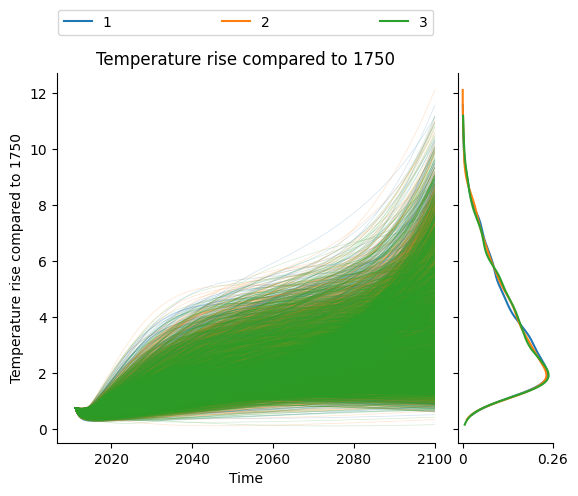

In [76]:

fig, axes = lines(experiments,
                  outcomes,
                  outcomes_to_show=outcome, 
                  group_by=grouping_variable,
                  density=Density.KDE, 
                  legend=legend, 
#                   grouping_specifiers=grouping_specifiers,
                  )
main_plot = list(axes.values())[0]
for line in main_plot.get_lines():
    line.set_linewidth(0.5)
    line.set_alpha(0.2)
main_plot.set_xlim(xmax=2100)
sns.despine(fig)


In [75]:
sns.despine?

In [70]:
for line in main_plot.get_lines()
    line.set_linewidth(0.5)

1.5

In [ ]:
def classify_highest_temperature_increase(outcomes):
    outcome = outcomes['Temperature rise compared to 1750']
    classes = np.zeros(outcome.shape[0])
    average_initial = np.average(outcome[:,0])
    average_end = np.average(outcome[:,-1])
    stdev = np.std(outcome[:,-1])
    av_min_one_std = average_end - stdev
    av_plus_one_std = average_end + stdev
    max_end_value = np.max(outcome[:,-1])
    min_end_value = np.min(outcome[:,-1])
    print('average_initial = {}, average_end = {}'.format(average_initial, average_end))
    print('max_end_value = {}, min_end_value = {}'.format(max_end_value, min_end_value))
    print('av_min_one_std = {}'.format(av_min_one_std))
    rel_cut_off = 0.15
#     abs_cut_off = min_end_value + rel_cut_off * (max_end_value - min_end_value)
    abs_cut_off = av_plus_one_std
#     if abs_cut_off > average_initial:
#         print('Average initial {}, cut off: {}'.format(average_initial, abs_cut_off))
    classes[outcome[:,-1]<abs_cut_off] = 1
    return classes

def classify_lowest_food_shortage(outcomes):
    outcome = outcomes['Global food shortage']
    classes = np.zeros(outcome.shape[0])
    average_initial = np.average(outcome[:,0])
    average_end = np.average(outcome[:,-1])
    stdev = np.std(outcome[:,-1])
    av_min_one_std = average_end - stdev
    av_plus_one_std = average_end + stdev
    max_end_value = np.max(outcome[:,-1])
    min_end_value = np.min(outcome[:,-1])
    print('average_initial = {}, average_end = {}'.format(average_initial, average_end))
    print('max_end_value = {}, min_end_value = {}'.format(max_end_value, min_end_value))
    print('av_min_one_std = {}'.format(av_min_one_std))
    rel_cut_off = 0.15
#     abs_cut_off = min_end_value + rel_cut_off * (max_end_value - min_end_value)
    abs_cut_off = av_plus_one_std
#     if abs_cut_off > average_initial:
#         print('Average initial {}, cut off: {}'.format(average_initial, abs_cut_off))
    classes[outcome[:,-1]<abs_cut_off] = 1
    return classes



# PRIM for highest temperature increase

average_initial = 0.75594175, average_end = 3.6489699865949996
max_end_value = 12.115095, min_end_value = 0.15347573
av_min_one_std = 1.687892040039356


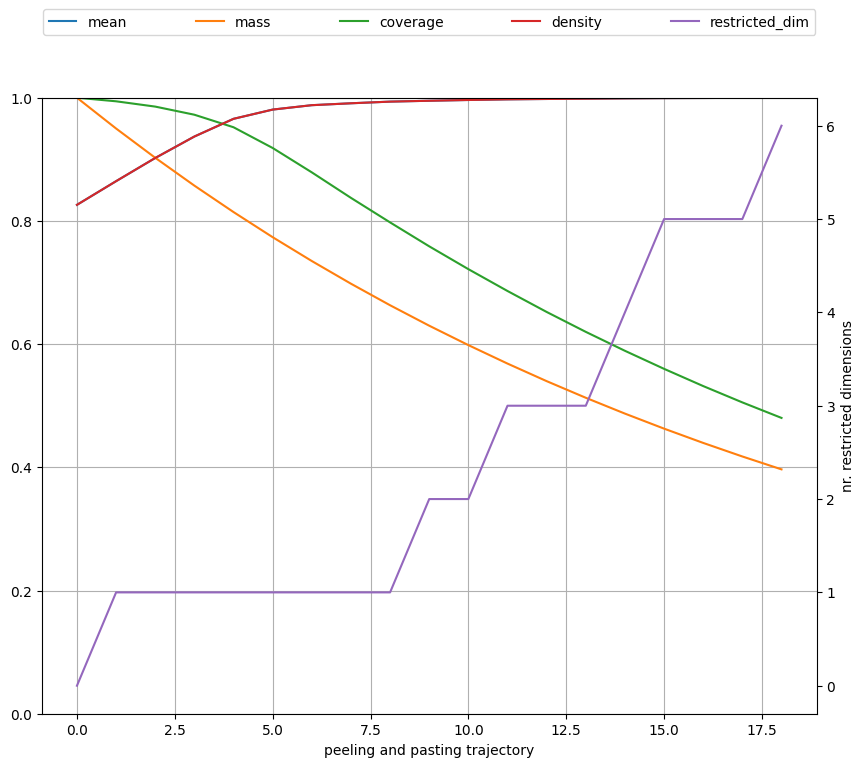

In [22]:
prim_obj = prim.setup_prim(results, 
                           classify_highest_temperature_increase, 
                           threshold=0.5, mass_min=0.001)

box1 = prim_obj.find_box()
box1.show_ppt()

fig = plt.gcf()
fig.set_size_inches(10, 8)
# fig = plt.gcf()
# ax = fig.axes[0]

coverage    0.918412
density     0.980739
id          5.000000
mass        0.773600
mean        0.980739
res_dim     1.000000
Name: 5, dtype: float64

                             box 5                            
                               min       max qp value qp value
Average renewable growth  0.030375  0.099997      0.0      NaN



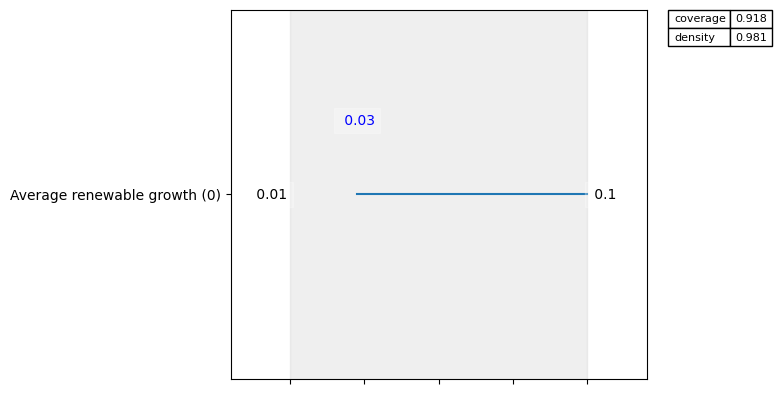

In [24]:
box1_choice = 5
box1_output = box1.inspect(box1_choice)
primfig = box1.inspect(box1_choice, style='graph')
#primfig.set_size_inches(15, 4)

box1_df = prim_obj.boxes_to_dataframe()

In [25]:
print(box1_df)

                                                       box 1          
                                                         min       max
Average renewable growth                            0.043246  0.099997
Initial soil carbon storage per landtype[Other ...   0.00003  0.000084
Initial soil carbon storage per landtype[Forest...  0.000095  0.000336
Initial biomass carbon storage per landtype[For...  0.000004  0.000017
Initial biomass carbon storage per landtype[Pas...       0.0       0.0
Initial biomass carbon storage per landtype[Wet...  0.000002  0.000009


In [26]:
box1.select(10)

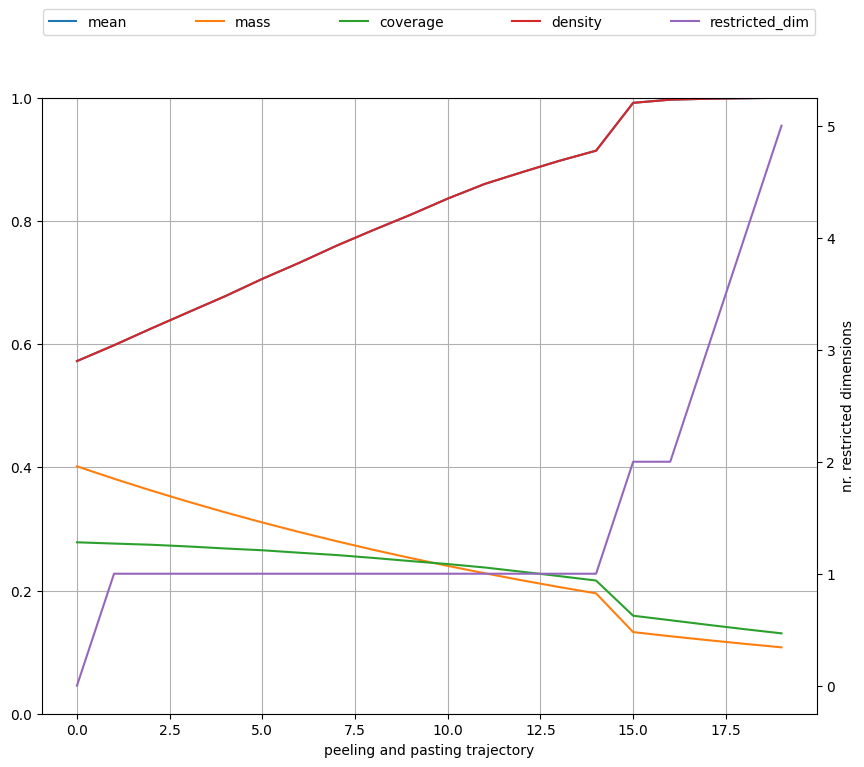

In [27]:
box2 = prim_obj.find_box()
box2.show_ppt()

fig = plt.gcf()
fig.set_size_inches(10, 8)

# PRIM global food shortage

average_initial = 279719680.0, average_end = 6924580381.625
max_end_value = 146815800000.0, min_end_value = 134494850.0
av_min_one_std = -13138191471.282166


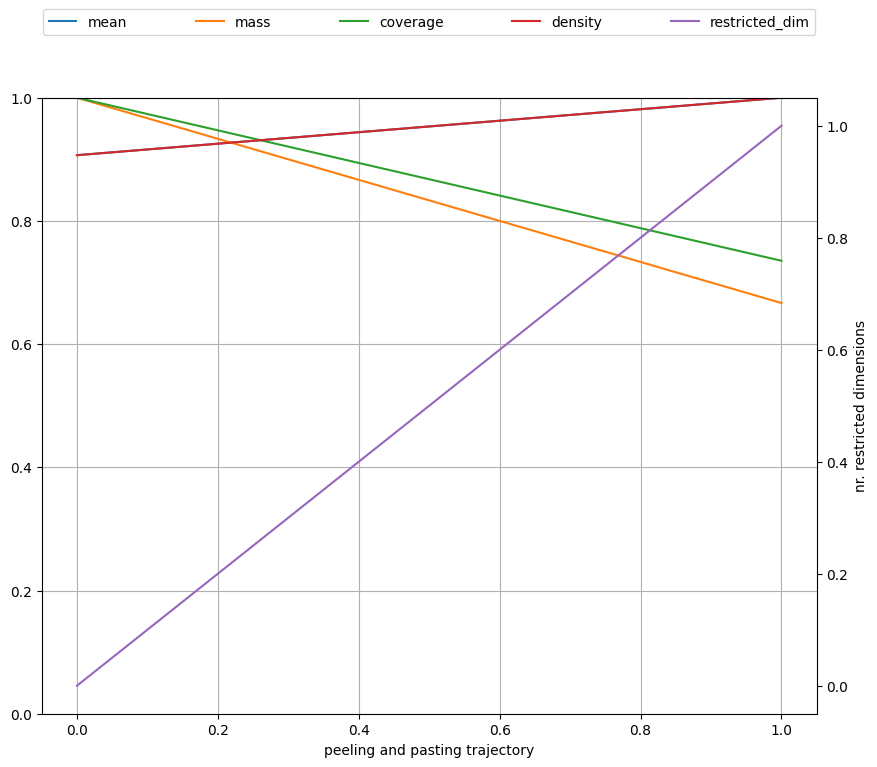

In [34]:
prim_obj = prim.setup_prim(results, 
                           classify_lowest_food_shortage, 
                           threshold=0.5, mass_min=0.001)

box1 = prim_obj.find_box()
box1.show_ppt()

fig = plt.gcf()
fig.set_size_inches(10, 8)
# fig = plt.gcf()
# ax = fig.axes[0]

coverage    0.735304
density     1.000000
id          1.000000
mass        0.666700
mean        1.000000
res_dim     1.000000
Name: 1, dtype: float64

                                     box 1                                
                                       min     max       qp value qp value
Switch land conversion merit order  {2, 3}  {2, 3}  2.569958e-284      NaN



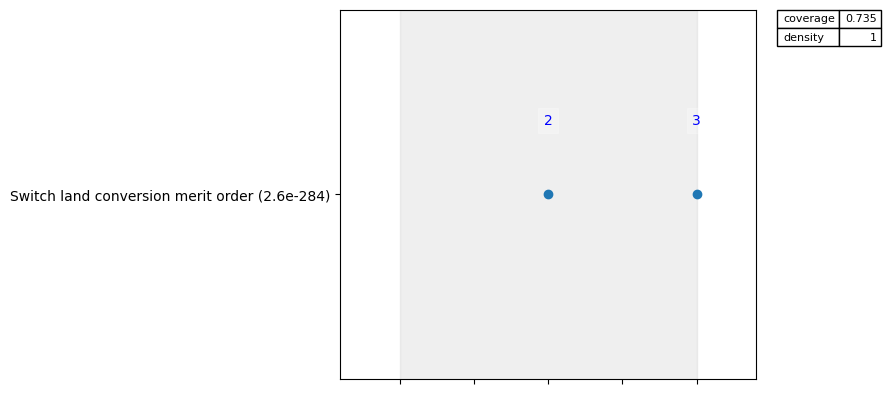

In [39]:
box1_choice = 1
box1_output = box1.inspect(box1_choice)
primfig = box1.inspect(box1_choice, style='graph')
#primfig.set_size_inches(15, 4)

box1_df = prim_obj.boxes_to_dataframe()